In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Cargar CSV
df_iter = pd.read_csv("resultadositer.csv")
df_n = pd.read_csv("resultadosn.csv")
df_nest = pd.read_csv("resultadosnests.csv")
df_todo = pd.read_csv("resultadostodo.csv")

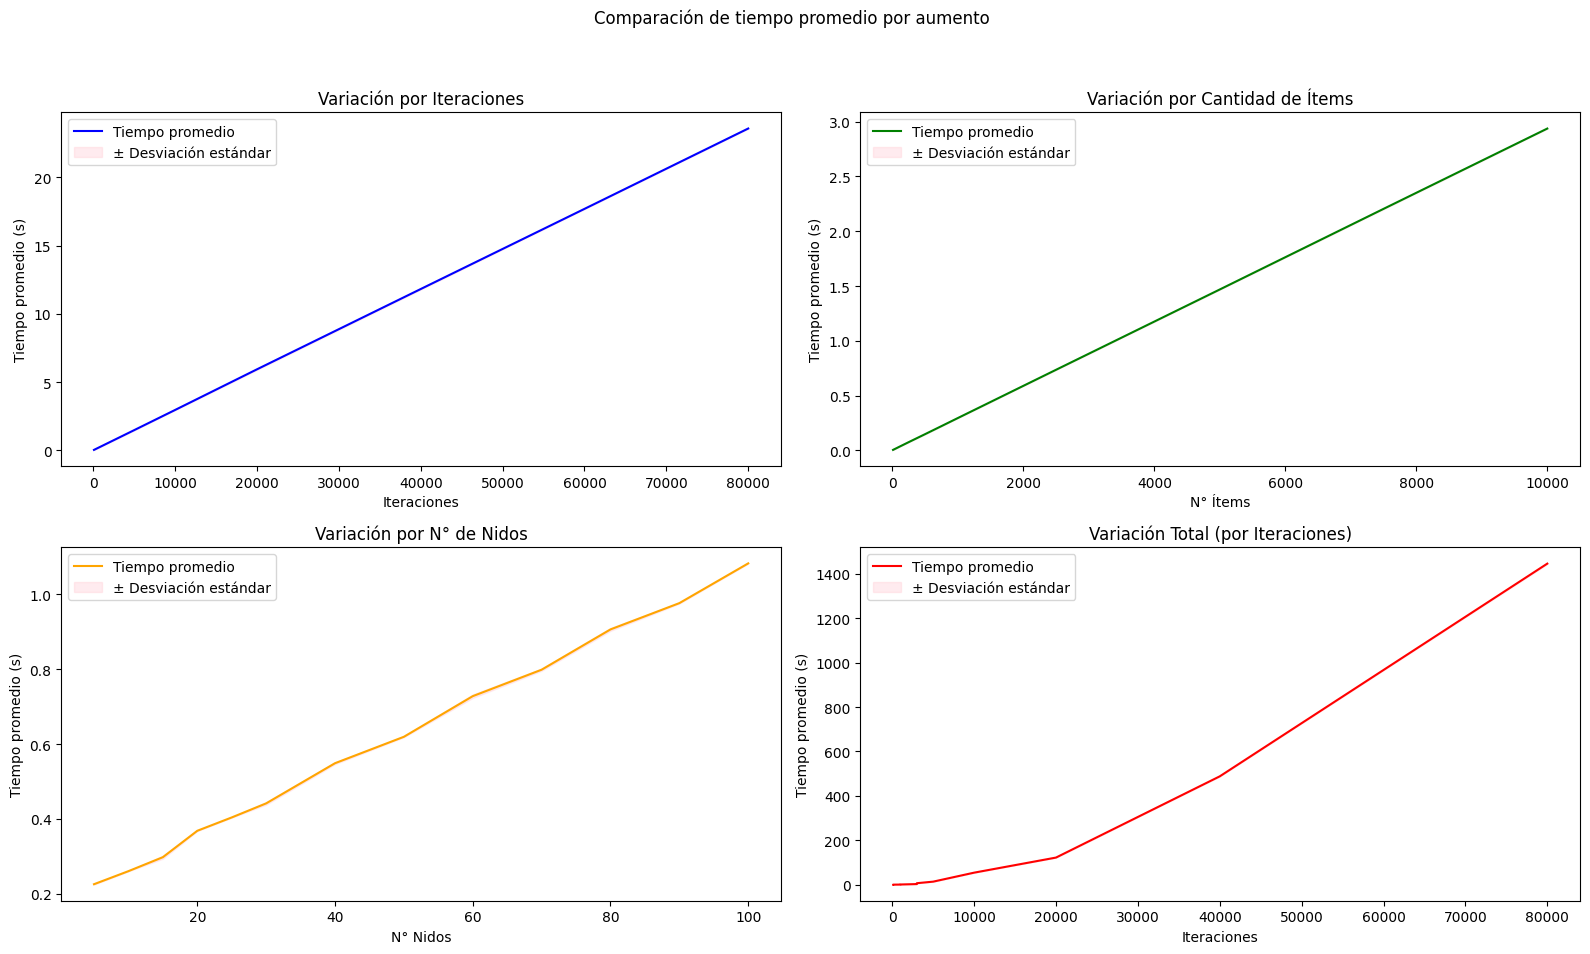

In [4]:
# Crear la figura
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Comparación de tiempo promedio por aumento ")

# Subplot 1: max_iter
axs[0, 0].plot(df_iter["max_iter"], df_iter["avg_time"], label="Tiempo promedio", color="blue")
axs[0, 0].fill_between(df_iter["max_iter"],
                       df_iter["avg_time"] - df_iter["std_dev"],
                       df_iter["avg_time"] + df_iter["std_dev"],
                       color="pink", alpha=0.3, label="± Desviación estándar")
axs[0, 0].set_title("Variación por Iteraciones")
axs[0, 0].set_xlabel("Iteraciones")
axs[0, 0].set_ylabel("Tiempo promedio (s)")
axs[0, 0].legend()

# Subplot 2: n_items
axs[0, 1].plot(df_n["n_items"], df_n["avg_time"], label="Tiempo promedio", color="green")
axs[0, 1].fill_between(df_n["n_items"],
                       df_n["avg_time"] - df_n["std_dev"],
                       df_n["avg_time"] + df_n["std_dev"],
                       color="pink", alpha=0.3, label="± Desviación estándar")
axs[0, 1].set_title("Variación por Cantidad de Ítems")
axs[0, 1].set_xlabel("N° Ítems")
axs[0, 1].set_ylabel("Tiempo promedio (s)")
axs[0, 1].legend()

# Subplot 3: n_nests
axs[1, 0].plot(df_nest["n_nests"], df_nest["avg_time"], label="Tiempo promedio", color="orange")
axs[1, 0].fill_between(df_nest["n_nests"],
                       df_nest["avg_time"] - df_nest["std_dev"],
                       df_nest["avg_time"] + df_nest["std_dev"],
                       color="pink", alpha=0.3, label="± Desviación estándar")
axs[1, 0].set_title("Variación por N° de Nidos")
axs[1, 0].set_xlabel("N° Nidos")
axs[1, 0].set_ylabel("Tiempo promedio (s)")
axs[1, 0].legend()

# Subplot 4: total (usando max_iter como eje representativo)
axs[1, 1].plot(df_todo["max_iter"], df_todo["avg_time"], label="Tiempo promedio", color="red")
axs[1, 1].fill_between(df_todo["max_iter"],
                       df_todo["avg_time"] - df_todo["std_dev"],
                       df_todo["avg_time"] + df_todo["std_dev"],
                       color="pink", alpha=0.3, label="± Desviación estándar")
axs[1, 1].set_title("Variación Total (por Iteraciones)")
axs[1, 1].set_xlabel("Iteraciones")
axs[1, 1].set_ylabel("Tiempo promedio (s)")
axs[1, 1].legend()

# Ajustar layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

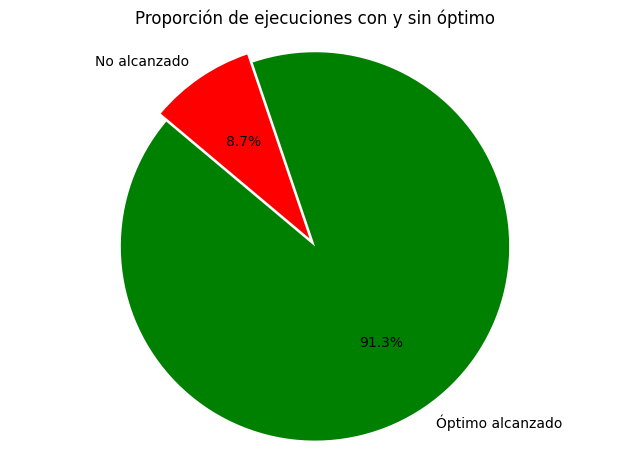

In [8]:
labels = ['Óptimo alcanzado', 'No alcanzado']
sizes = [9131, 10000-9131]
colors = ['green', 'red']
explode = (0.05, 0)  # para destacar el óptimo

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Proporción de ejecuciones con y sin óptimo")
plt.axis('equal')
plt.tight_layout()
plt.show()
